In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        images = []
        labels = []
        lines = training_file.readlines()[1:] #get rid of first header row
        for i in range(1, len(lines)):
            line = lines[i].split(',')
            labels.append(line[0])
            images.append(np.array_split(line[1:], 28))
        images = np.array(images).astype('float')
        labels = np.array(labels).astype('float')
        
    return images, labels

path_sign_mnist_train = "sign_mnist_train.csv"
path_sign_mnist_test = "sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27454, 28, 28, 1)
(27454,)
(7171, 28, 28, 1)
(7171,)


In [4]:
# Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255)

training_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size = 32)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size = 32)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(25, activation="softmax")])

# Compile Model. 
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='sparse_categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])

# Train the Model
history = model.fit_generator(training_generator, epochs = 3, verbose = 1,
                             validation_data = validation_generator)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/3
858/858 [==============================] - 31s 36ms/step - loss: 2.8397 - acc: 0.1430 - val_loss: 1.9613 - val_acc: 0.3648
Epoch 2/3
858/858 [==============================] - 30s 35ms/step - loss: 2.1677 - acc: 0.3249 - val_loss: 1.4059 - val_acc: 0.5376
Epoch 3/3
858/858 [==============================] - 31s 36ms/step - loss: 1.7319 - acc: 0.4483 - val_loss: 0.9833 - val_acc: 0.6695


[184.99449157714844, 0.49630457162857056]

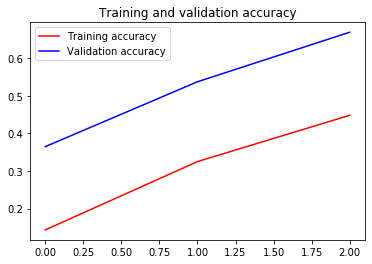

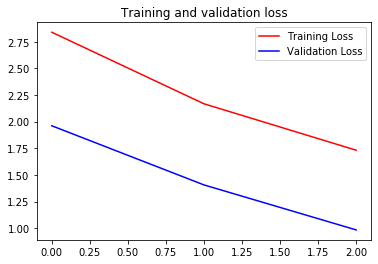

In [21]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()